In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas_profiling as pp
plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR




In [2]:
data_ori = pd.read_csv('train.csv')

In [3]:
pp.ProfileReport(data_ori)

In [4]:
# 데이터 프레임 복사
data = data_ori.copy()

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


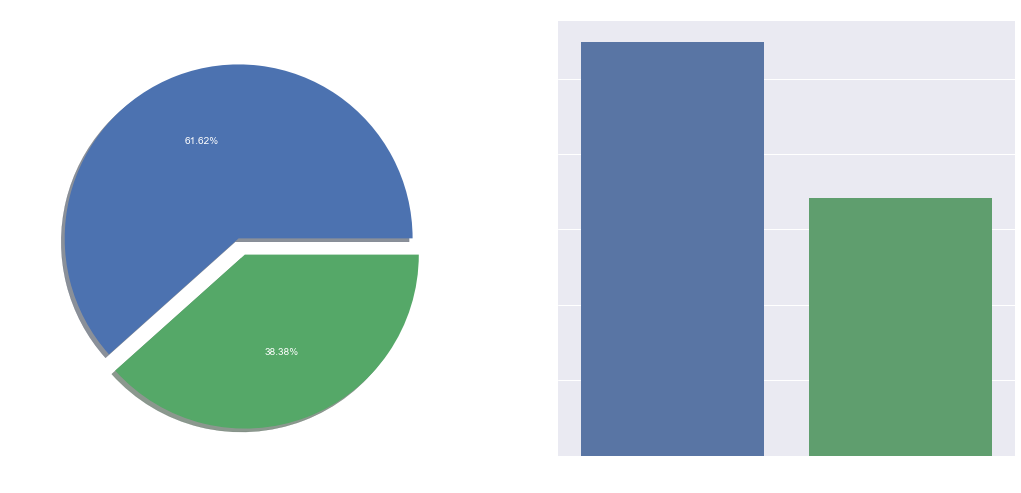

In [6]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('Count')
plt.show()

In [7]:
pd.crosstab([data.Pclass,data.Survived],data.Sex,margins=True).style.background_gradient(cmap='PRGn')

In [8]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

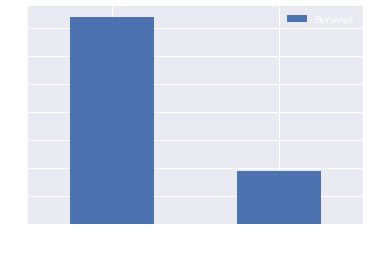

In [23]:

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

#배경, 레이블회전 
n_points = data.shape[0]
id_counts = data['Survived'].value_counts()
fig  = plt.gca()
locs, labels = plt.xticks(rotation=360)
# print(locs,labels)
plt.show()

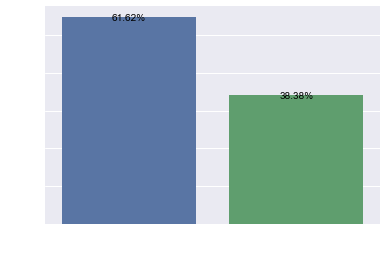

In [31]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'

sns.countplot(data = data, x = 'Survived')
n_points = data.shape[0]
# add annotations
sur_counts = data['Survived'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

	# get the text property for the label to get the correct count
    count = sur_counts[int(label.get_text())]
    pct_string = '{:0.2f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

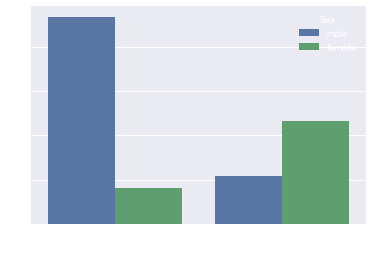

In [39]:
sns.countplot('Survived', hue='Sex', data=data)
plt.ylabel('')
plt.show()

0    0.616162
1    0.383838
Name: Survived, dtype: float64


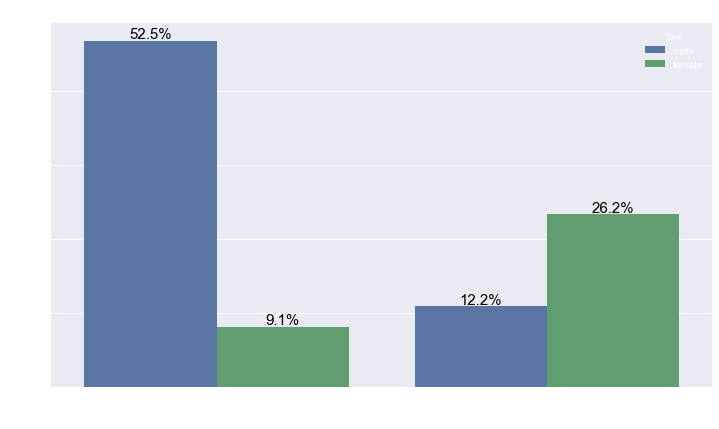

In [38]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data.Survived,hue=data['Sex'],order = 
data['Survived'].value_counts().index)
plt.title("Survived VS Sex",fontsize=15)
plt.tight_layout()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/total),
        ha="center", fontsize=15, color='black')

print(data['Survived'].value_counts(normalize=True))

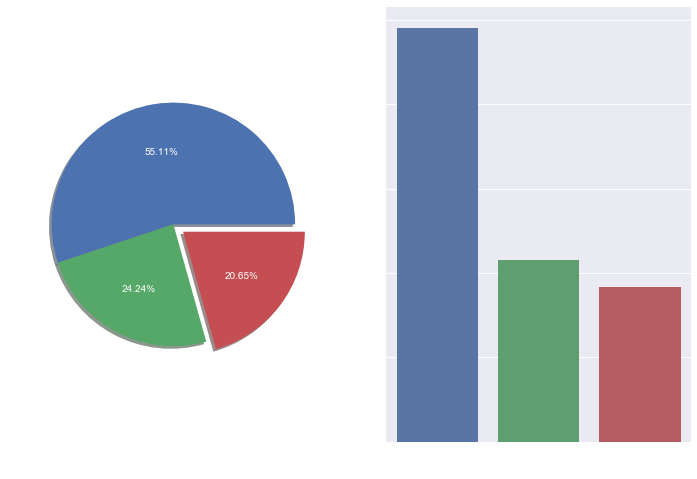

In [10]:
f , ax = plt.subplots(1,2, figsize=(12,8))
f = data['Pclass'].value_counts().plot.pie(explode=[0, 0, 0.1],autopct='%.2f%%',ax=ax[0], shadow=True)

# 색을 넣고 싶을 때
'''
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3']. ax=ax[0])
'''

#subplot에서 xtick label회전하기

'''
f.set_xticklabels(f.get_xticklabels(), rotation=360,
                  horizontalalignment='right',
                  fontweight='light',                 
                 )
'''

# countplot 정렬하기
sns.countplot('Pclass', data=data, ax=ax[1], order = data['Pclass'].value_counts().index)

plt.show()

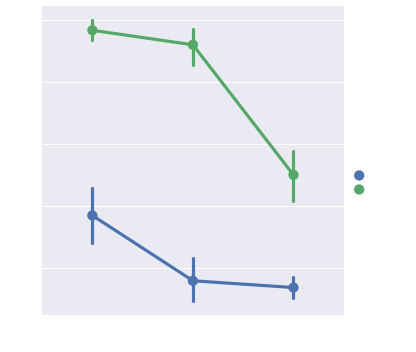

In [11]:
sns.factorplot('Pclass','Survived', hue='Sex', data=data)


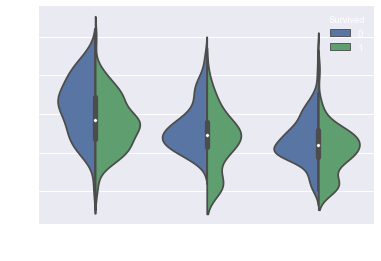

In [12]:
sns.violinplot('Pclass','Age', hue='Survived', split=True, data=data)
#split=True로 인하여 두 항목이 같이 표기 된다

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data['Initial']

# 공백 기준으로 이름 따오기

# data['First'] = 0
# for i in data:
#     data['First'] = data.Name.str.split(expand=True)[1]
# data['First']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [14]:
data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [15]:
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='PRGn')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev','Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss','Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)
data['Initial']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

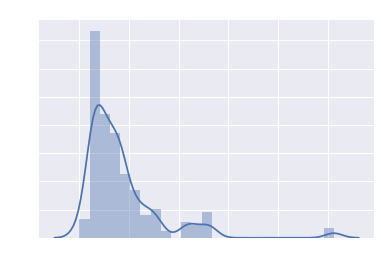

In [17]:
sns.distplot(data[data['Pclass'] == 1].Fare)
plt.title('Fare Distribution of Pclass 1')
plt.show()

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [19]:
# data.groupby('Initial')['Age'].mean()
data.groupby('Initial')['Age'].count()

Initial
Master     36
Miss      150
Mr        409
Mrs       110
Other       9
Name: Age, dtype: int64

In [20]:
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'),'Age'] = 46

In [21]:
data.Age.isnull().any()

False

In [22]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

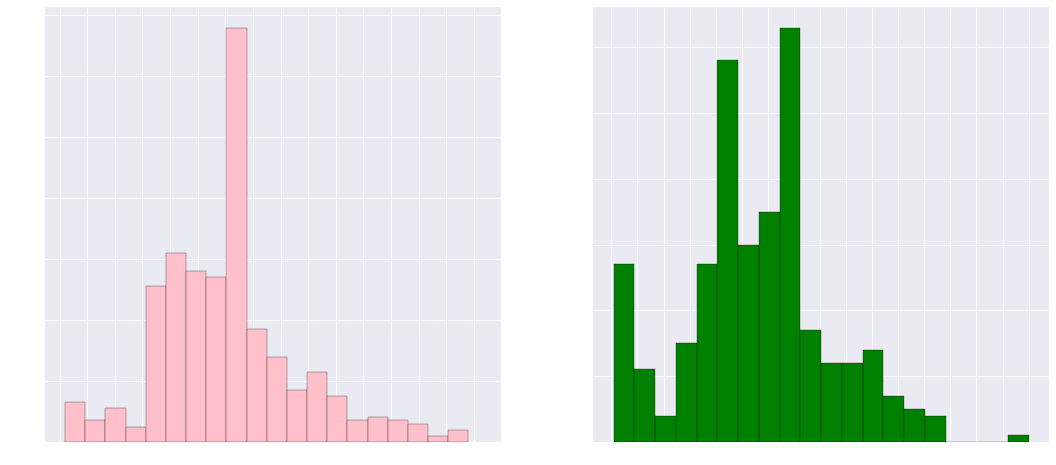

In [23]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='pink')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

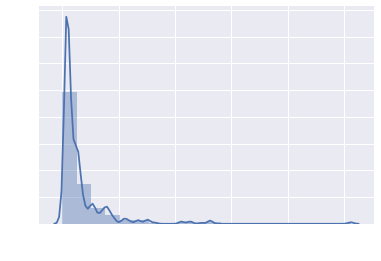

In [24]:
sns.distplot(data['Fare'], bins=20)

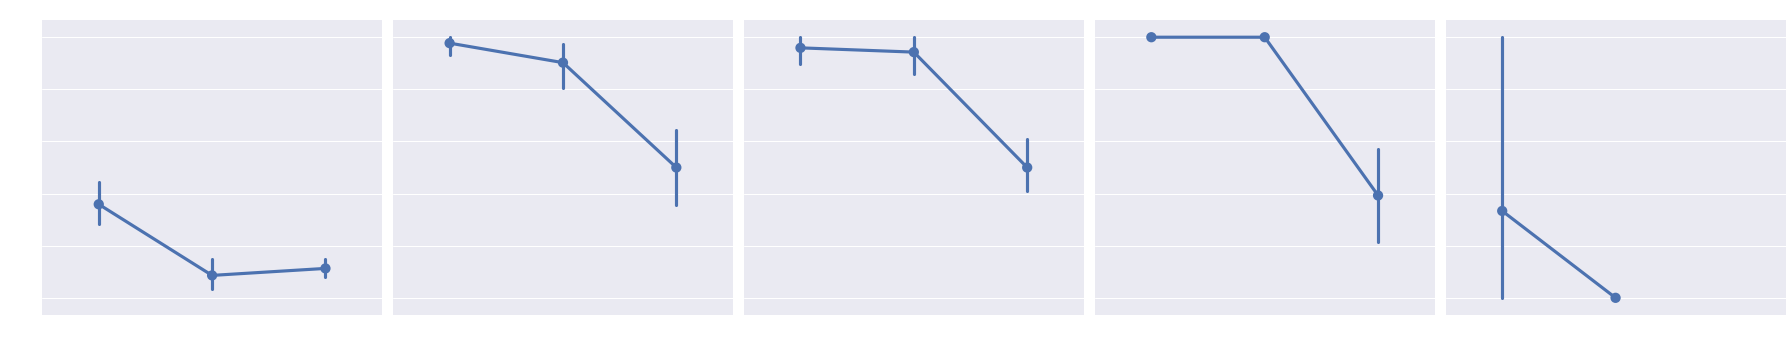

In [25]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

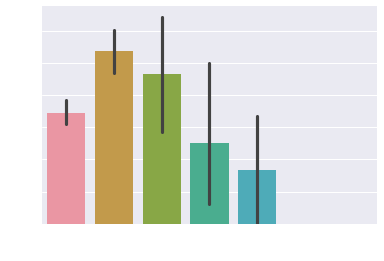

In [26]:
sns.barplot('SibSp', 'Survived', data=data)

In [27]:
# unique한 값 찾기
a = data['Embarked'].unique()
print(a)

['S' 'C' 'Q' nan]


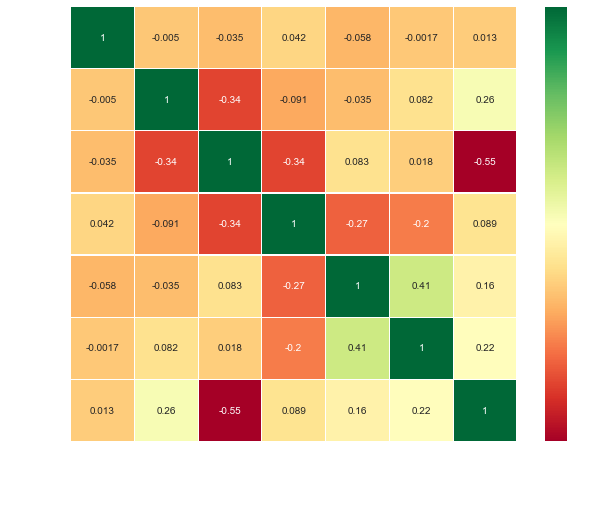

In [28]:
# pd.merge(data,)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth= 0.2)

# heatmap이 cut off되어서 수정해 주는 코드 (stackoverflow보니깐 matplotlib버전문제인듯?)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 

fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [29]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] >16)&(data['Age'] <=32), 'Age_band'] = 1
data.loc[(data['Age'] >32)&(data['Age'] <=48), 'Age_band'] = 2
data.loc[(data['Age'] >48)&(data['Age'] <=64), 'Age_band'] = 3
data.loc[data['Age'] >64, 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


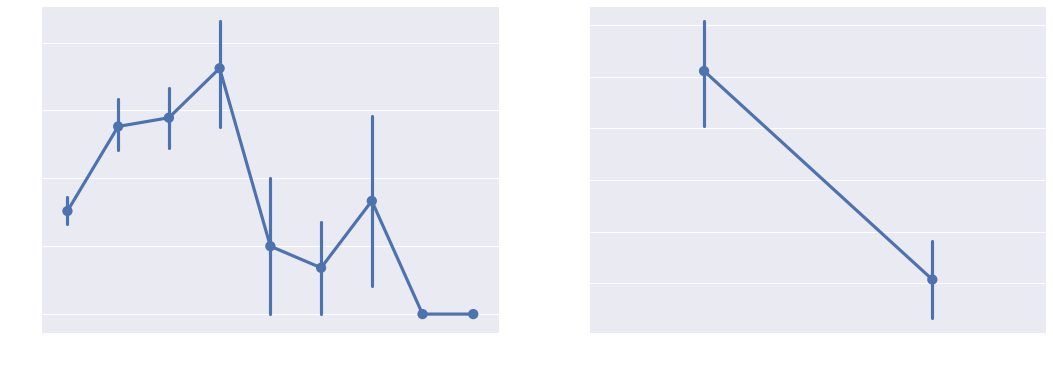

In [30]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

f, ax = plt.subplots(1,2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
plt.close(2)
plt.close(3)
plt.show()


In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


pd.cut()으로 동일 길이로 나누어서 범주를 만든 후 GroupBy()로 그룹별 통계량 구하기

pd.qcut()으로 동일 개수로 나누어서 범주를 만든 후 GroupBy()로 그룹별 통계량 구하기

In [32]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='PRGn')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [33]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91)&(data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454)&(data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31)&(data['Fare'] <= 513), 'Fare_cat'] = 3
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


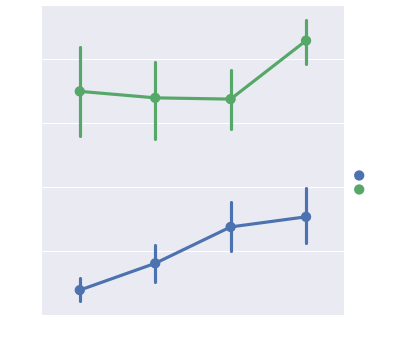

In [34]:
# factorplot 은 알아서 비율조정해줌!!
sns.factorplot('Fare_cat', 'Survived', data=data ,hue='Sex')
plt.show()

In [35]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Initial          object
Age_band          int64
Family_Size       int64
Alone             int64
Fare_Range     category
Fare_cat          int64
dtype: object

data['Sex'] , data['Initial'] 은 labelencoder가 되는데.. data['Embarked']는 왜
labelencoder가 안되는지 모르겠음 아래코드..

In [36]:
# from sklearn.preprocessing import LabelEncoder


# e = LabelEncoder()
# data['Sex'] = e.fit_transform(data['Sex'])
# data['Initial'] = e.fit_transform(data['Initial'])

# dtype change
# data["Embarked"] = data["Embarked"].astype(str)

# print(data['Initial'].unique())
# data.dtypes
print(data.shape)
data.head()

(891, 18)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


In [37]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
# data['Embarked'].replace(['S', 'C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0,1,2,3,4], inplace=True)

In [38]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [40]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,S,0,1,1,0,0
1,1,1,1,1,0,C,1,2,1,0,3
2,1,3,1,0,0,S,2,1,0,1,1
3,1,1,1,1,0,S,1,2,1,0,3
4,0,3,0,0,0,S,0,2,0,1,1


data['Embarked'] 만 따로 원핫인코딩을 해줌!!

In [41]:
# onehot encoding 
data = pd.get_dummies(data=data, columns=['Embarked'], prefix='Em')
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Initial,Age_band,Family_Size,Alone,Fare_cat,Em_C,Em_Q,Em_S
0,0,3,0,1,0,0,1,1,0,0,0,0,1
1,1,1,1,1,0,1,2,1,0,3,1,0,0
2,1,3,1,0,0,2,1,0,1,1,0,0,1
3,1,1,1,1,0,1,2,1,0,3,0,0,1
4,0,3,0,0,0,0,2,0,1,1,0,0,1


In [42]:
train, test = train_test_split(data, test_size=0.3 , random_state=0, stratify = data['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [43]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X ,train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is : ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is :  0.835820895522388


In [44]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy of the Logistic Regreesion is : ', metrics.accuracy_score(prediction2, test_Y))

Accuracy of the Logistic Regreesion is :  0.8134328358208955


In [45]:
model = KNeighborsClassifier()
model.fit(train_X , train_Y)
prediction3 = model.predict(test_X)
print('Auccuracy of the KNN is : ', metrics.accuracy_score(prediction3, test_Y))

Auccuracy of the KNN is :  0.8171641791044776


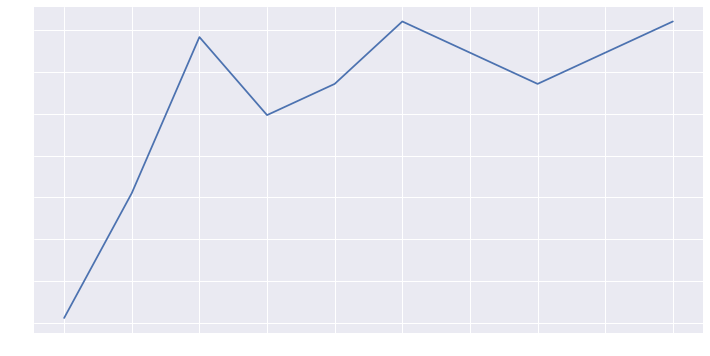

Accuracy for different calues of n are:  [0.76119403 0.79104478 0.82835821 0.80970149 0.81716418 0.83208955
 0.82462687 0.81716418 0.82462687 0.83208955] and max values  0.832089552238806


In [46]:
a_index = list(range(1,11))
a = pd.Series()
# x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(a_index)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracy for different calues of n are: ', a.values, 'and max values ', a.values.max())
    

In [47]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy of the Naivebayes : ' ,metrics.accuracy_score(prediction4 ,test_Y))

Accuracy of the Naivebayes :  0.7910447761194029


In [48]:
model = RandomForestClassifier(n_estimators=200) #결정트리 개수(적당히 많은 수가 좋음 그만큼 cost가 높다)
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy of the Random Forests : ', metrics.accuracy_score(prediction5, test_Y))

Accuracy of the Random Forests :  0.8208955223880597


In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits = 10, random_state=1)
xyz=[]
accuracy = []
std = []
max_num = []

classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=200)]

for model in models:
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    max_num.append(cv_result.max())
    accuracy.append(cv_result)

new_df = pd.DataFrame({'CV mean': xyz, 'Max_predict' : max_num ,'Std': std } , index=classifiers)

# for acc in list(accuracy):
#     print(max(acc))

new_df
    

,CV mean,Max_predict,Std
Linear Svm,0.799089,0.876404,0.051400
Radial Svm,0.829413,0.876404,0.034694
Logistic Regression,0.810325,0.853933,0.020989
KNN,0.804831,0.876404,0.045324
Decision Tree,0.810362,0.853933,0.030058
Naive Bayes,0.787940,0.831461,0.033377
Random Forest,0.810350,0.865169,0.030986


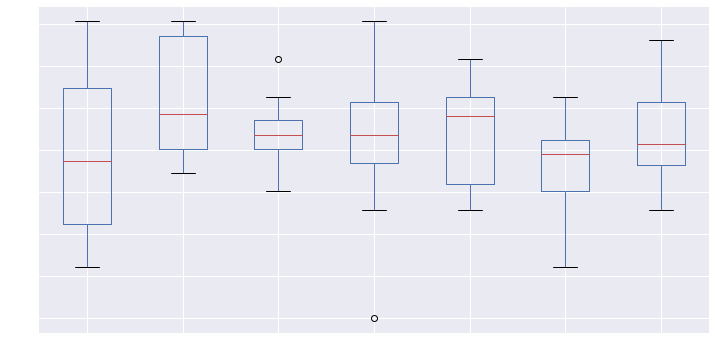

In [50]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

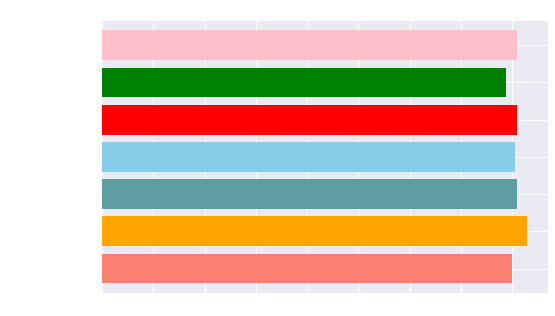

In [51]:
# 기존 data bar는 자동으로 다양한 color설정이 되었는데 여기선 이유를 모르겠지만 안되서 직접 color 넣어줌!

colors = ['salmon', 'orange', 'cadetblue', 'skyblue', 'red', 'green', 'pink']
new_df['CV mean'].plot.barh(width = 0.8, color= colors)
plt.title('Average CV Mean Accuracy')
fig= plt.gcf()
fig.set_size_inches(8,5)
plt.show()

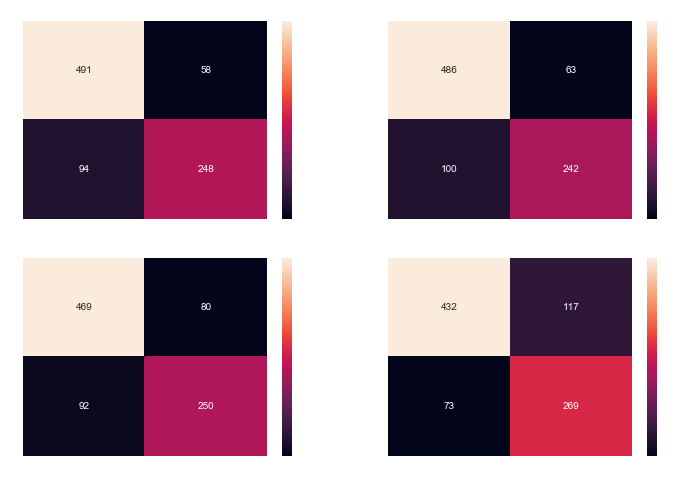

In [52]:
f ,ax = plt.subplots(2,2, figsize=(12,8))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
ax[0,0].set_ylim(2.0 , 0) # 또 버전때문에 matrix 깨져서 또 수정함!!!

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for KNN')
ax[0,1].set_ylim(2.0 , 0)

y_pred = cross_val_predict(LogisticRegression(), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Logistic Regression')
ax[1,0].set_ylim(2.0 , 0)

y_pred = cross_val_predict(GaussianNB(), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Naive Bayes')
ax[1, 1].set_ylim(2.0 , 0)
# plt.subplots_adjust(hspace=0.2 ,wspace=0.2)
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV

C = [0.05 , 0.1, 0.2, 0.3, 0.25, 0.4, 0.15, 0.8, 0.9, 1 ]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']

hyper = {'kernel': kernel , 'C':C, 'gamma' : gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8305274971941639
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    5.4s finished


In [54]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid=hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   14.7s finished


0.8125701459034792
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [55]:
#voting = 'soft', 'hard' , 개별 분류기의 예측을 평균 내어 확률이 가장 높은 클래스로 예측한다.
#간접 투표 분류기 (직접투표방식보다 성능이 높다. 즉 'hard' 보다 높다)
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf= VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors=10)),('RBF',svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),('RFor',RandomForestClassifier(n_estimators=500, random_state = 0)),('LR',LogisticRegression(C=0.05)),('DT', DecisionTreeClassifier(random_state=0)), ('NB', GaussianNB()),('svm',svm.SVC(kernel= 'linear', probability = True))],voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y, cv= 10, scoring= "accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is:  0.8246268656716418
The cross validated score is 0.8237912836227442


In [56]:
from sklearn.ensemble import BaggingClassifier


# bagging 은 bootstrapping 방법으로 샘플링 하는것이 핵심
# model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators= 700)

model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=0, n_estimators= 100),n_estimators=15)
model.fit(train_X, train_Y)
prediction= model.predict(test_X)
print('The accuracy for bagged Random Forest is:', metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Random Forest is:', result.mean())

The accuracy for bagged Random Forest is: 0.8246268656716418
The cross validated score for bagged Random Forest is: 0.8215687776642833


In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate= 0.1)
# ada.fit(train_X, train_Y)
# prediction = ada.predict(test_X)
# print(metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(ada, X, Y, cv=20, scoring='accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8282652613087397


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state=0, learning_rate=0.1)

# grad.fit(train_X, train_Y)
# prediction = grad.predict(test_X)
# print(metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(grad, X, Y, cv=10, scoring= 'accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.810433265236636


In [59]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate= 0.1)

# xgboost.fit(train_X, train_Y)
# prediction = xgboost.predict(test_X)
# print(metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160259902394735


In [60]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd= GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper, verbose=True)
gd.fit(X,Y)

# print(gd.best_score_)
# print(gd.best_estimator_)
print(gd.best_params_)



Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  3.6min finished


{'learning_rate': 0.05, 'n_estimators': 200}


validation_curve 함수는 최적화할 파라미터 이름과 범위, 그리고 성능 기준을 param_name, param_range, scoring 인수로 받아 파라미터 범위의 모든 경우에 대해 성능 기준을 계산한다.

In [61]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-10, -1, 10)
train_scores, test_scores = validation_curve(svm.SVC(), X, Y,
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=1)

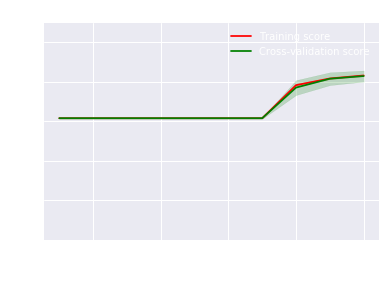

In [62]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean,
             label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.legend(loc="best")
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()


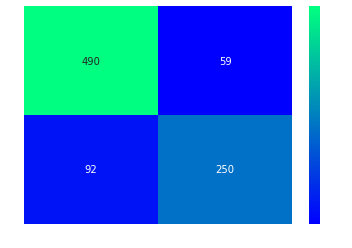

In [63]:
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot= True, fmt ='2.0f')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show()

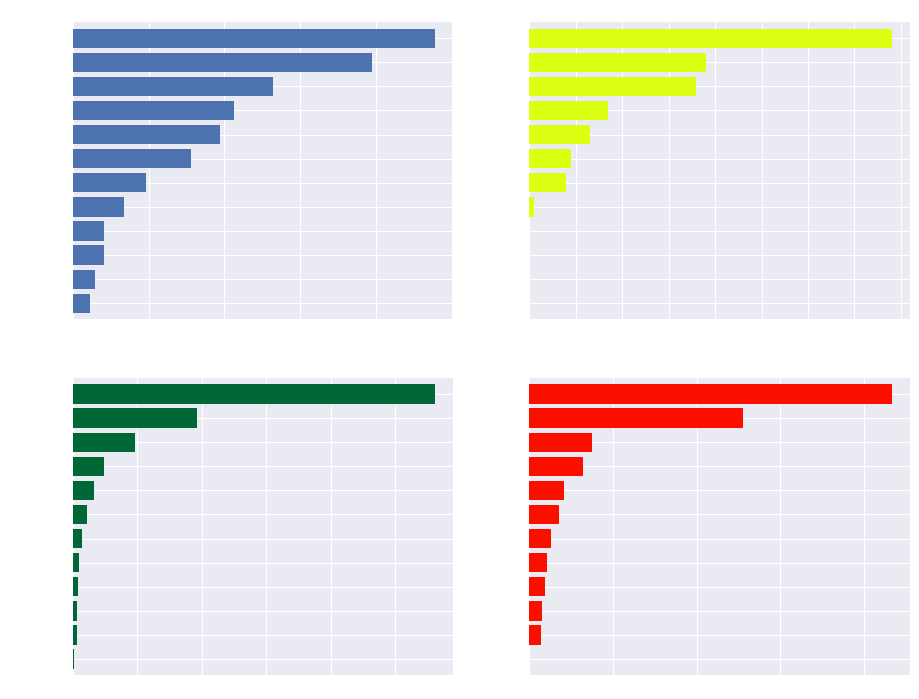

In [64]:
f, ax= plt.subplots(2, 2, figsize=(15,12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X ,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()